# Lending Club Data Analysis

The basic aim of this data analysis project is to predict the loan_status of the applicant and for that we will be using Random Forest Ensemble cladssifier to predict the loan status of the applicant.


## Importing the data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
% matplotlib inline

In [4]:
start_df = pd.read_csv('C://Users/Saurabh/Desktop/Home Work/IDS Assignments/data/Dataset/loan.csv', low_memory=False)

In [6]:
start_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Making a copy of the dataframe
df = start_df.copy()

In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Checking the dimensions
df.shape

(887379, 74)

In [10]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

## Understanding the data

Lets check the description of the data provided on the kernal

In [11]:
df_description = pd.read_excel("C://Users/Saurabh/Desktop/Home Work/IDS Assignments/data/Dataset/LCDataDictionary.xlsx").dropna()

In [12]:
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [13]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [14]:
def null_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis = 1)
    mis_val_ren_columns = mis_val_table.rename(columns={0 : "Missing Values", 1 : "% of Missing Values"})
    mis_val_ren_columns = mis_val_ren_columns[mis_val_ren_columns.iloc[:,1] != 0].sort_values('% of Missing Values',ascending=False).round(1)
    print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_ren_columns.shape[0]) +
              " columns that have missing values.")
    return mis_val_ren_columns

In [15]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(20)


Dataframe has 74 columns.
There are 40 columns that have missing values.


,Missing Values,% of Missing Values
dti_joint,886870,99.9
annual_inc_joint,886868,99.9
verification_status_joint,886868,99.9
il_util,868762,97.9
mths_since_rcnt_il,866569,97.7
total_cu_tl,866007,97.6
inq_fi,866007,97.6
all_util,866007,97.6
max_bal_bc,866007,97.6
open_rv_24m,866007,97.6


Now if we have a look at the percentage of missing data in many columns is far more than we could work with . So it is better if we remove a certain columns by setting a threshold values in the further section.


In [16]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Here we are interested in the loan status with default value thus we assign 1 as default and 0 for any other category.

In [17]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    886160
1      1219
Name: TARGET, dtype: int64

From the above output we can clearly see that this is the case of imbalance class problem where the value of class is far less than the other. There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not. Now since we have modified the targer variable we will drop the loan_status variable

In [18]:
df.drop('loan_status',axis=1,inplace=True)

Now let us visualize the datatypes that we will be working with

Text(0,0.5,'Data type')

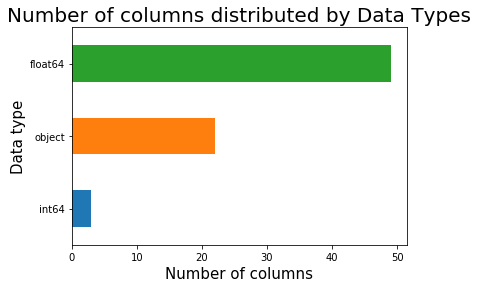

In [19]:
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

After looking at the above distribution we can say that there are quite a number of columns that have object as the datatype which will impose problem while modelling

In [20]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                              2
grade                             7
sub_grade                        35
emp_title                    299271
emp_length                       11
home_ownership                    6
verification_status               3
issue_d                         103
pymnt_plan                        2
url                          887379
desc                         124469
purpose                          14
title                         63144
zip_code                        935
addr_state                       51
earliest_cr_line                697
initial_list_status               2
last_pymnt_d                     98
next_pymnt_d                    100
last_credit_pull_d              103
application_type                  2
verification_status_joint         3
dtype: int64

We would want to label encode the columns having only 2 categorical data and one-hot encode columns with more than 2 categorical data. Also, columns like emp_title, url, desc, etc. should be dropped because there aren't any large number of unique data for any of the categories they contain. Also, Principal Component Analysis can be carried out for the one-hot encoded columns to bring the feature dimensions down.

# Anomaly Detection

In [21]:
df['emp_length'].isnull().sum()

44825

In [23]:
df['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

Filling na values with 0 and fiotering numbers in place of year using a regular expression to extract the mumbers from a string

In [24]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

Checking the null values in the emp_length variable again to verify that there are no null values in the column

In [25]:
df['emp_length'].isnull().sum()

0

In [26]:
df['emp_length'].value_counts()

10    291569
1     127700
2      78870
3      70026
5      55704
4      52529
0      44825
7      44594
8      43955
6      42950
9      34657
Name: emp_length, dtype: int64

In [27]:
df['id'].dtype

dtype('int64')

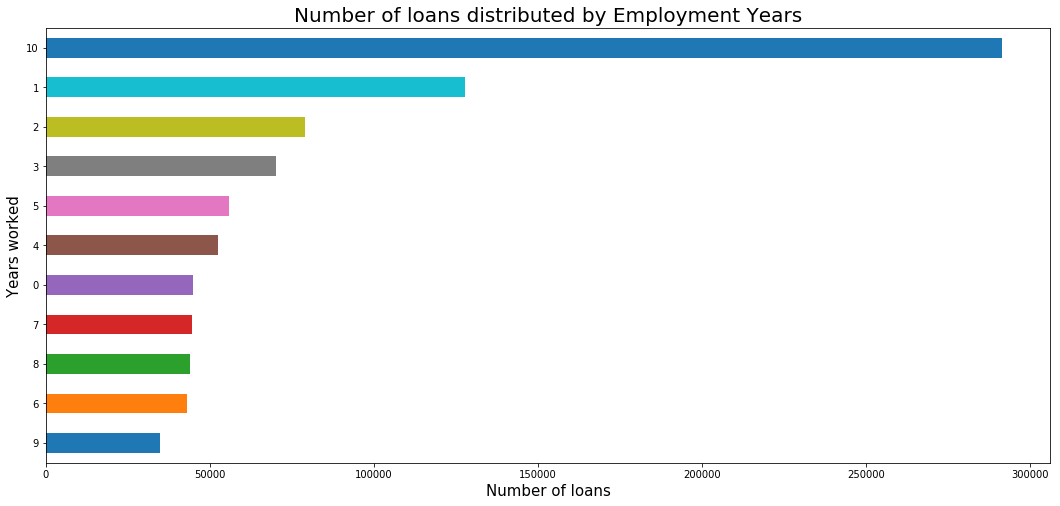

In [28]:
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

The column looks fine. Also, it can be seen that people who have worked for 10 or more years are more likely to take a loan.

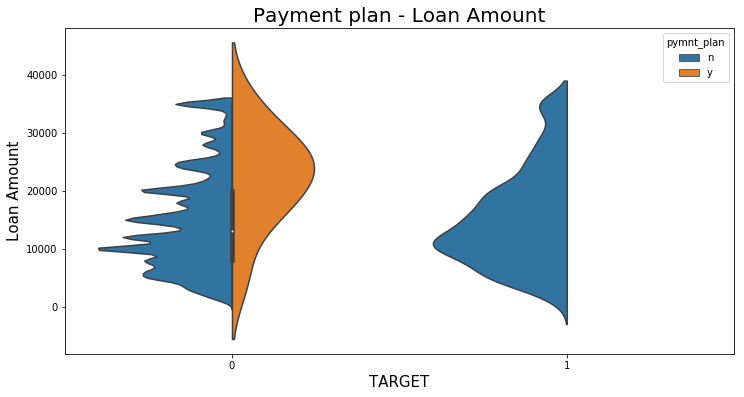

In [75]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

Naturally, the defaulted loans had no payment plan

# Exploratory Data Analysis

Let us remove all the columns with more than 70% missing data as they won't be helping for modelling and exploration.

In [39]:
#Storing TRUE if the count of that column is less than 70%
temp = [i for i in df.count()<887379 *0.30] 

In [42]:
#Dropping the columns that have more than 70% of na values
df.drop(df.columns[temp],axis=1,inplace=True)

In [43]:
#Finding the correlation of Target Vlaues and then sorting the correlation -1 to 1 
corr = df.corr()['TARGET'].sort_values()

Let us now display the strong correlations between the targer variable and the columns that we found after filtering them

In [47]:
#Displaying the correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 dti                   0.003912
revol_util            0.004831
inq_last_6mths        0.006042
total_rec_int         0.010490
total_rec_late_fee    0.011758
out_prncp             0.013938
out_prncp_inv         0.013944
int_rate              0.024485
TARGET                1.000000
policy_code                NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 last_pymnt_amnt    -0.013132
total_rec_prncp    -0.012085
id                 -0.010041
member_id          -0.009836
total_pymnt        -0.007590
total_pymnt_inv    -0.007448
tot_cur_bal        -0.007036
annual_inc         -0.004743
total_rev_hi_lim   -0.004729
recoveries         -0.004157
Name: TARGET, dtype: float64


Besides from the perfect correlation of TARGET column with itself, columns like int_rate which is interest rate, out_prncp_inv which is remaining outstanding principal, etc. have high positive correlation with the TARGET column and these are quite true as higher the interest rate, higher it is harder for a borrower to pay back a loan. However, columns like out_prncp_inv, out_prncp, total_rec_int, total_rec_late_fee, inq_last_6mths and revol_util are bound to be higher when a borrower doesn't pay back a loan and thus doesn't carry much significance. So, the column of interest after int_rate could be the dti which is the Debt to Income ratio which understandably will affect if a borrower can pay back a loan or not.

Also, columns like recoveries, total_rev_hi_lim, etc. have negative correlation with the TARGET column as a borrower who has paid back money is more likely to repay the loan.

Now we will examine debt to income ratio and interest rate against target variable

In [51]:
df.corr()['dti'].sort_values().tail(6)

int_rate       0.079903
revol_util     0.087844
total_acc      0.108056
open_acc       0.144250
dti            1.000000
policy_code         NaN
Name: dti, dtype: float64

We can conclude from the above output that higher the debt to income ratio higher will be the interest rate i.e it is positively correlated with dti ratio

Now, we shall plot some Kernal Density Estimation plots to see how the interest rate  and debt to income ratio are ddistributed for the Target variable

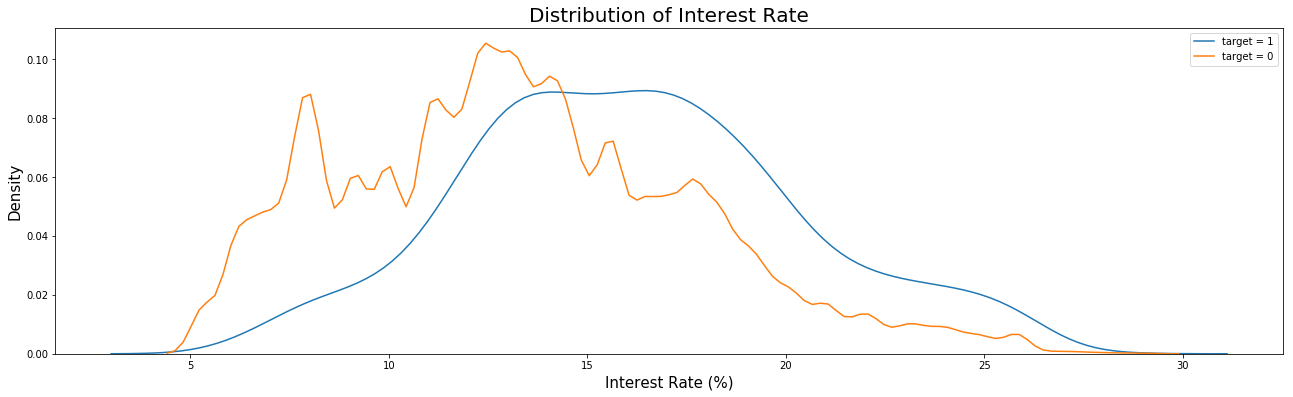

In [52]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

Here by looking at the above kernal density plots we can say that interest rate follow kind of Gaussian distribution with more density rates between 12-18%

### Violin-plot of TARGET classes with distribution of loan amount differentiated by the terms.

In [54]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

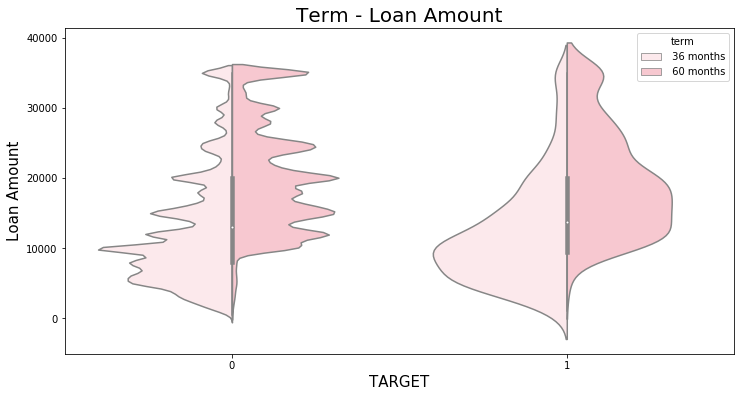

In [57]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET", y="loan_amnt", data=df, hue="term", split=True, color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

From the above visualization we can say that higher the term higher is the loan amount

### Violin-plot of TARGET classes with distribution of loan amount differentiated by the application type.

In [59]:
df["application_type"].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

Since we have 2 types of the application lets have a look at the distribution of loan amount for target variable with application type

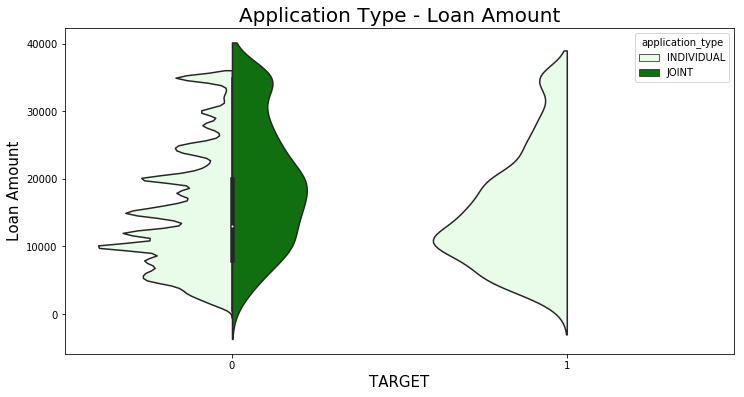

In [61]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET", y="loan_amnt", data=df, hue="application_type", split=True, color="green")
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

From the above violin plot we can say that all the loans that have been defaulted are from individuals rather than from two or more people

In [62]:
df['application_type'].value_counts()

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

Also after seeing the number of count for application type we cant really infer that joint application status are completely safe from default loan status i.e  it isn't significant enough to conclude that the loan taken by all Joint applicants are paid back.

### Violin-plot of TARGET classes with distribution of interest rate differentiated by the loan grades

In [63]:
df["grade"].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

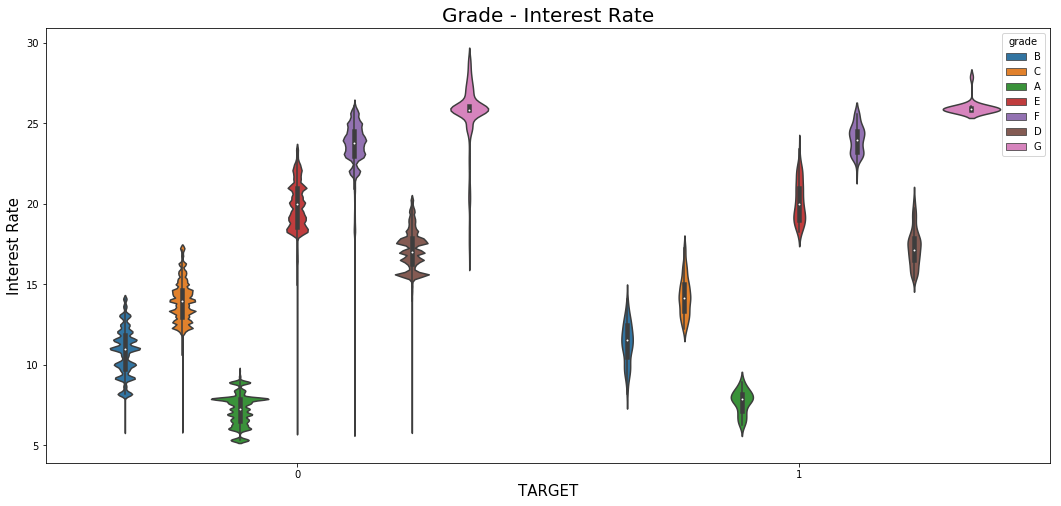

In [80]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="TARGET",y="int_rate",data=df, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

We can say that both target classes have similar kind of interest rates by grades.

Let us also check the correlation of annual income with loan amount taken.

In [65]:
df.corr()['annual_inc'].sort_values().tail(10)

out_prncp_inv       0.211254
total_rev_hi_lim    0.268860
revol_bal           0.295784
installment         0.326182
funded_amnt_inv     0.331420
funded_amnt         0.332466
loan_amnt           0.332698
tot_cur_bal         0.418332
annual_inc          1.000000
policy_code              NaN
Name: annual_inc, dtype: float64

The annual income of the applicant has high positive correlation with the amount of loan they have taken.

### From where do most of the loans tend to be defaulted?

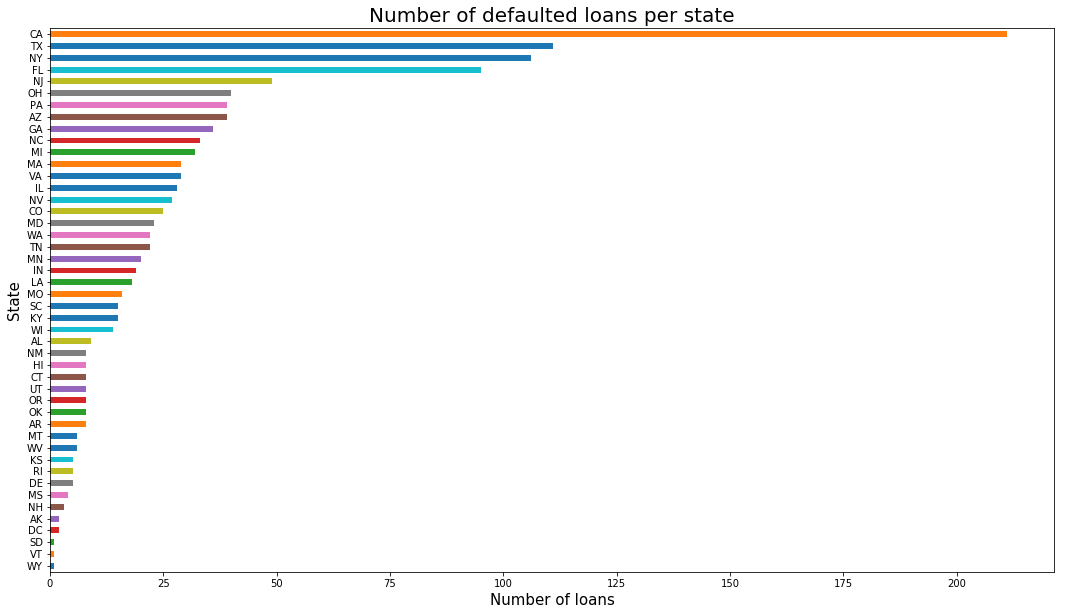

In [66]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==1].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

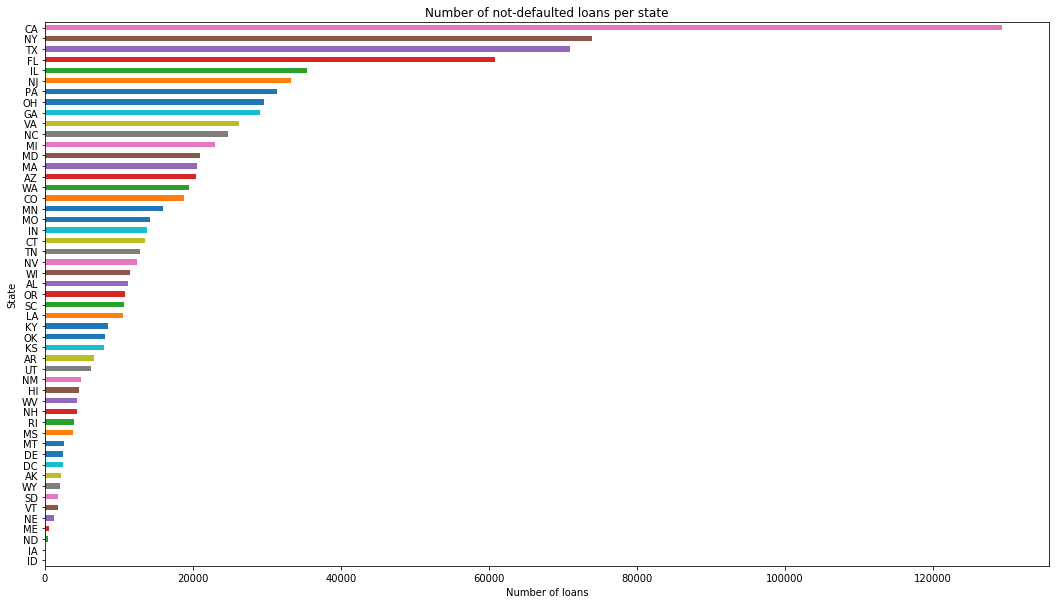

In [70]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==0].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State')
plt.xlabel('Number of loans')
plt.title('Number of not-defaulted loans per state');

It can be seen that there are more number of loans taken amount from the same states where there are more number of defaulted risk. This is why the state cannot be taken as a major feature for knowing if a loan will be defaulted or not.

Let's see if we have any members taking multiple loans.

In [73]:
df['member_id'].value_counts().head(2)

58732538    1
353782      1
Name: member_id, dtype: int64

From the results above we can state that not a single member has taken loan more than once thus we can drop the column

## Cleaning the data

As we had observe, some columns like annual_inc, int_rate, etc. may be much useful for building our model but on the other hand, some columns like id, member_id, etc. will not be helping.

Also, columns like 'title' and 'emp_title' are text which cannot be one-hot encoded / label encoded as they have arbitrary categorical text and very less unique data for each of their categories.

In [74]:
df['emp_title'].value_counts().head()

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Name: emp_title, dtype: int64

In [75]:
df.drop(['id','member_id','emp_title','title','zip_code','url'],axis=1,inplace=True)

In [76]:
df.shape

(887379, 48)

Now we have reduced the data to 48 columns.Let's print them out to get a quick look of what we are dealing with,

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 48 columns):
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null object
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_length                    887379 non-null object
home_ownership                887379 non-null object
annual_inc                    887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
pymnt_plan                    887379 non-null object
purpose                       887379 non-null object
addr_state                    887379 non-null object
dti                           88737

In [95]:
df.loc[:,('issue_d','TARGET')].head(10)

,issue_d,TARGET
0,Dec-2011,0
1,Dec-2011,0
2,Dec-2011,0
3,Dec-2011,0
4,Dec-2011,0
5,Dec-2011,0
6,Dec-2011,0
7,Dec-2011,0
8,Dec-2011,0
9,Dec-2011,0


First, We'll be converting the date object columns into integer number of years or months just because we do not want to blow up the number of feature columns by performing one-hot encoding on them. For filling the null values we have taken the dates with the highest number of counts.

In [102]:
#Converting the field to datetime and extracting the year and storing it in Integer format
df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%Y')))

In [104]:
#Printing the datatype of the column we just formatted
df['issue_d'].dtype

dtype('int64')

In [111]:
#Printing the mode of lastpayment date to fill in the  na values
pd.to_datetime(df['last_pymnt_d']).value_counts().head(1)

2016-01-01    470150
Name: last_pymnt_d, dtype: int64

In [108]:
#Printing the mode of last credit pull date to fill in the  na values
pd.to_datetime(df['last_credit_pull_d']).value_counts().head(1)

2016-01-01    730574
Name: last_credit_pull_d, dtype: int64

In [109]:
#Printing the mode of earliest credit line date to fill in the  na values
pd.to_datetime(df['earliest_cr_line']).value_counts().head(1)

2001-08-01    6659
Name: earliest_cr_line, dtype: int64

In [110]:
#Printing the mode of next payment date to fill in the  na values
pd.to_datetime(df['next_pymnt_d']).value_counts().head(1)

2016-02-01    553406
Name: next_pymnt_d, dtype: int64

In [112]:
df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'].fillna('2016-01-01')).apply(lambda x: int(x.strftime('%m')))
df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'].fillna(value = '2016-02-01')).apply(lambda x:int(x.strftime("%Y")))

`Let's see how we can handle our categorical data. Two methods we can use are Label Encoding and One Hot Encoding.

The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. So, If we only have two unique values for a categorical variable (such as Yes/No), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the better option.

However, due to the large number of columns originated after One-Hot Encoding, we may have to conduct Principle Component Analysis (PCA) for dimensionality reduction.

In [115]:
from sklearn import preprocessing

In [116]:
#Performing label encoding on the object datatypes with 2or less than 2 unique categories
count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


And one-hot encoding the rest categorical columns.

In [122]:
#Changing the structure of the object datatypes by performing one hot encoding
df=pd.get_dummies(df)

In [123]:
print(df.shape)

(887379, 168)


For the 'mths_since_last_delinq' column, We'll be filling in the missing value with the median of the columns as the data in the column is continuous.

In [128]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())

However for columns like 'total_rev_hi_lim','tot_col_ammnt',etc. , We won't be filling in the missing data because they will certainly be of high feature importance due to their description. If they do not seem to be of high importance we can always re-iterate and fill the missing values later.

So, dropping all remaining null values,

In [129]:
#Dropping the NA values
df.dropna(inplace=True)

Now we check the count of the dataset

In [132]:
#Printing the count of the data in columns and printing the head of the data
df.count().sort_values().head(3)

loan_amnt                   816722
purpose_home_improvement    816722
purpose_house               816722
dtype: int64

In [133]:
df['TARGET'].value_counts()

0    815522
1      1200
Name: TARGET, dtype: int64

 We are now left with a reasonable amount of data for modelling.

## Modeling